<a href="https://colab.research.google.com/github/Elwing-Chou/ml0602/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [26]:
names = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

cat


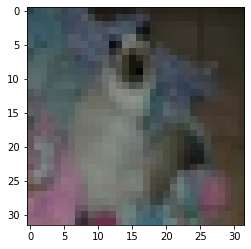

In [27]:
# mnist: (60000, ) [5, 2, 1, 0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個) * 128 + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation="relu"),
    # 128 * 10 + 10(bias) = 1290
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 512)        

In [29]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [30]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 5s - loss: 1.8217 - accuracy: 0.3225 - val_loss: 1.3724 - val_accuracy: 0.5108
Epoch 2/100
225/225 - 4s - loss: 1.3708 - accuracy: 0.5024 - val_loss: 1.1110 - val_accuracy: 0.6088
Epoch 3/100
225/225 - 4s - loss: 1.1282 - accuracy: 0.5998 - val_loss: 0.9670 - val_accuracy: 0.6564
Epoch 4/100
225/225 - 4s - loss: 0.9570 - accuracy: 0.6680 - val_loss: 0.8393 - val_accuracy: 0.7178
Epoch 5/100
225/225 - 4s - loss: 0.8177 - accuracy: 0.7180 - val_loss: 0.7587 - val_accuracy: 0.7354
Epoch 6/100
225/225 - 4s - loss: 0.6936 - accuracy: 0.7599 - val_loss: 0.6982 - val_accuracy: 0.7572
Epoch 7/100
225/225 - 4s - loss: 0.5957 - accuracy: 0.7960 - val_loss: 0.7040 - val_accuracy: 0.7602
Epoch 8/100
225/225 - 4s - loss: 0.5053 - accuracy: 0.8267 - val_loss: 0.7021 - val_accuracy: 0.7654
Epoch 9/100
225/225 - 4s - loss: 0.4318 - accuracy: 0.8524 - val_loss: 0.7124 - val_accuracy: 0.7712
Epoch 10/100
225/225 - 4s - loss: 0.3454 - accuracy: 0.8810 - val_loss: 0.6926 - val_accura

In [32]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7674 - accuracy: 0.7670


[0.7674257755279541, 0.7670000195503235]